# Assignment 1 - Steve Ferenzi
### Understanding Uncertainty
### Due 9/5

1. Create a new public repo on Github under your account. Include a readme file.
2. Clone it to your machine. Put this file into that repo.
3. Use the following function to download the example data for the course:

In [1]:
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download complete
Extracting data files...
Data extracted


4. Open one of the datasets using Pandas:
    1. `ames_prices.csv`: Housing characteristics and prices
    2. `college_completion.csv`: Public, nonprofit, and for-profit educational institutions, graduation rates, and financial aid
    3. `ForeignGifts_edu.csv`: Monetary and in-kind transfers from foreign entities to U.S. educational institutions
    4. `iowa.csv`: Liquor sales in Iowa, at the transaction level
    5. `metabric.csv`: Cancer patient and outcome data
    6. `mn_police_use_of_force.csv`: Records of physical altercations between Minnessota police and private citizens
    7. `nhanes_data_17_18.csv`: National Health and Nutrition Examination Survey
    8. `tuna.csv`: Yellowfin Tuna Genome (I don't recommend this one; it's just a sequence of G, C, A, T )
    9. `va_procurement.csv`: Public spending by the state of Virginia

In [45]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [65]:
# Using the ForeignGifts_edu.csv file

gifts = pd.read_csv('/Users/steveferenzi/Desktop/UVA MSDS/courses/5030 Understanding Uncertainty/assignments/1/data/ForeignGifts_edu.csv', header=0)


5. Pick two or three variables and briefly analyze them
    - Is it a categorical or numeric variable?
    - How many missing values are there? (`df['var'].isna()` and `np.sum()`)
    - If categorical, tabulate the values (`df['var'].value_counts()`) and if numeric, get a summary (`df['var'].describe()`)

## Choosing Country of Giftor and Foreign Gift Amount

In [ ]:
# Country of Giftor

gifts.info()                        #Country of Giftor = object 

gifts['Country of Giftor'].isna()   #Check for missing values in Country of Giftor columnn = False

missing_values = np.sum(gifts['Country of Giftor'].isnull())
print(missing_values)                      #Country of Giftor missing values = 0

gifts['Country of Giftor'].value_counts()  #Count of unique values in Country of Giftor column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB
0


Country of Giftor
ENGLAND        3655
CHINA          2461
CANADA         2344
JAPAN          1896
SWITZERLAND    1676
               ... 
TOKELAU           1
BELARUS           1
BARBADOS          1
CROATIA           1
ANTIGUA           1
Name: count, Length: 155, dtype: int64

In [ ]:
# Foreign Gift Amount

gifts.info()                          #Foreign Gift Amount = numeric 

gifts['Foreign Gift Amount'].isna()   #Check for missing values in Foreign Gift Amount column = False

missing_values = np.sum(gifts['Foreign Gift Amount'].isnull())
print(missing_values)                  #Foreign Gift Amount missing values = 0

gifts['Foreign Gift Amount'].describe  #Summary statistics for Foreign Gift Amount column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB
0


<bound method NDFrame.describe of 0         250000
1         463657
2        3649107
3           1000
4          49476
          ...   
28216     381717
28217     444938
28218    1064580
28219     737375
28220    1024469
Name: Foreign Gift Amount, Length: 28221, dtype: int64>

6. What are some questions and prediction tools you could create using these data? Who would the stakeholder be for that prediction tool? What practical or ethical questions would it create? What other data would you want, that are not available in your data?

I would like to determine how much money China is investing in U.S. educational instituations, specifically through its Confucius Institutes (CIs). Gifts through Confucius Institutes come with strings attached by the Chinese Communist Party (CCP) to curtail academic freedom while promoting CCP ideology. These include conditions such as dictating the curriculum of Chinese language, culture, and history courses, censoring information on politically sensitive topics (Taiwan, Tibet, Tiananmen), and providing CCP political officers the placement to collect data on Chinese students abroad.

Based on current investment patterns I would like to predict where and how much China will invest in future CIs. The data may indicate China wants to invest heavilly in key states while ignoring others, or expand to other states once they reach a certain threshold in others. Key stakeholders are the universities themselves, their students, the U.S. government, and populations targeted by the CCP (Chinese/Taiwanese students, state legislators, diaspora locations, etc.). Practical implications would be how to compel the schools to reject Confucius Institute gifts (possibly by eliminating federal government support to those universities). Other useful data would be the number of Chinese students in those schools, as well as what specific efforts the money is going towards via the CIs (courses, cultural events, etc.).

Below I sorted to see which universities China is gifting to in general, and specifically which are receiving CIs. I then plotted the number of CI HQs by State. Interestingly, they appear concentrated in states on the west coast and south (plus NY). This makes sense given the tendenacy for large numbers of Chinese students to attend universities like UCLA, USC, Columbia, NYU.

In [61]:
gifts['Country of Giftor'].value_counts()

china_gifts = gifts[gifts['Country of Giftor'] == 'CHINA']
china_gifts.head(10)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
306,307,105700,University of South Alabama,Mobile,AL,43075,420000,Contract,CHINA,Fujian Univ of Trad Chinese Med
307,308,105700,University of South Alabama,Mobile,AL,43158,420000,Contract,CHINA,Medical Tech of Qiqihar Med Univ
308,309,105700,University of South Alabama,Mobile,AL,43166,420000,Contract,CHINA,Henan Univ of Chinese Medicine
309,310,105700,University of South Alabama,Mobile,AL,43173,280000,Contract,CHINA,Sanda Univ Sch of Int Medical Tech
310,311,105700,University of South Alabama,Mobile,AL,43173,420000,Contract,CHINA,Zhejiang Chinese Medical Univ
311,312,105700,University of South Alabama,Mobile,AL,43173,560000,Contract,CHINA,Tongi Univ School of Medicine
312,313,105700,University of South Alabama,Mobile,AL,43216,420000,Contract,CHINA,Nanjing Sport Institute
315,316,105700,University of South Alabama,Mobile,AL,43647,420000,Contract,CHINA,School of Medical Tech of Qiqihar


In [62]:
confucius_gifts = china_gifts[china_gifts['Giftor Name'] == 'Confucius Institute Headquarters']
confucius_gifts.head(10)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
350,351,108100,Arizona State University,Tempe,AZ,41842,138205,Contract,CHINA,Confucius Institute Headquarters
358,359,108100,Arizona State University,Tempe,AZ,41960,120000,Contract,CHINA,Confucius Institute Headquarters
389,390,108100,Arizona State University,Tempe,AZ,42261,143345,Contract,CHINA,Confucius Institute Headquarters
409,410,108100,Arizona State University,Tempe,AZ,42367,130000,Contract,CHINA,Confucius Institute Headquarters
549,550,108100,Arizona State University,Tempe,AZ,43070,154120,Contract,CHINA,Confucius Institute Headquarters
551,552,108100,Arizona State University,Tempe,AZ,43090,135000,Contract,CHINA,Confucius Institute Headquarters
5158,5159,131500,"University of California, Los Angeles",Los Angeles,CA,41799,408544,Monetary Gift,CHINA,Confucius Institute Headquarters
5773,5774,131500,"University of California, Los Angeles",Los Angeles,CA,42155,79973,Monetary Gift,CHINA,Confucius Institute Headquarters
7841,7842,131500,"University of California, Los Angeles",Los Angeles,CA,43210,137051,Monetary Gift,CHINA,Confucius Institute Headquarters


Text(0.5, 0, 'State')

<Figure size 1000x600 with 0 Axes>

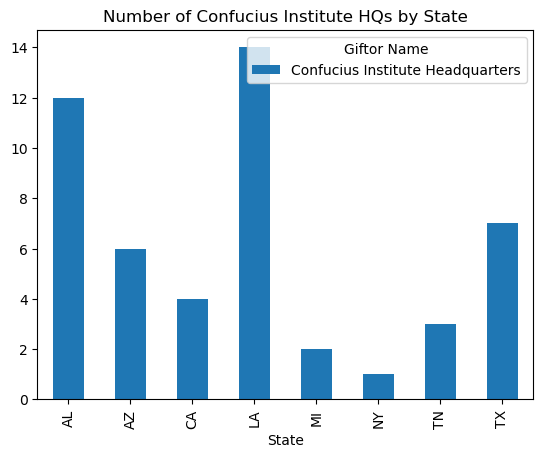

In [64]:
ct = pd.crosstab(confucius_gifts['State'], confucius_gifts['Giftor Name'])

plt.figure(figsize=(10,6))
ct.plot(kind='bar')
plt.title('Number of Confucius Institute HQs by State')
plt.xlabel('State')

7. Commit your work to the repo (`git commit -am 'Finish assignment'` at the command line, or use the Git panel in VS Code). Push your work back to Github and submit the link on Canvas in the assignment tab.